<a href="https://colab.research.google.com/github/murilopo/Data_Science_Projects/blob/master/Minerando_Dados_com_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Classificador de Renda Anual (USA).
---

[![LinkedIn](https://img.shields.io/badge/LinkedIn-MuriloAugustoPó-blue.svg)](https://www.linkedin.com/in/muriloaugustopo/)
[![GitHub](https://img.shields.io/badge/GitHub-murilopo-darkblue.svg)](https://github.com/amadords)


Diferente do que acontece no Brasil nos Estados Unidos a faixa salarial é definida de forma Anual. Isso é bem diferente da nossa cultura cuja é feita de forma mensal. Veja bem, nos Estados Unidos um funcioário que recebe 50 (cinquente mil reais) / ano equivale a um sálario mensal de 4.166 (quatro mil cento e sessenta e seis reais) 

<image width= '80%' src = 'https://image.freepik.com/free-vector/global-economy-money-business_24877-50954.jpg'>


## Objetivo
---

O objetivo deste notebook é fazer uma análise de Machine Learning se é possivel apartir de algumas `features` detectar se a renda de uma pessoa excede o valor de 50 (cinquenta) mil dólares por ano.

Habilidades Avaliadas
- Técnicas de Transformação e Preparação de dados
- Aplicação, Avaliação e `Tunning` de Modelos de Machine Learning para Classificação.

O **dataset** para este documento pode ser visualizado neste link - [Adult Names](https://www.dropbox.com/s/609ndu8uknr31jd/adult.data.csv?dl=0)

##Checklist
---
1. Conhecendo a Base de Dados
2. Visualizando Distribuições
3. Substituindo os Valores Faltantes
4. Selecionando Features Importantes
5. Treinando Modelos de Machine Learning
6. Fazendo Tuning do Modelo
7. Preparando a Versão Final do Modelo
8. Persistindo o Modelo em Disco

## 1.Conhecendo o Banco de Dados.

Descrição das Features: 

`Age` : Idade

`Workclass`: Para qual prgão o funcionário trabalha: Privado, Empreendedor, Publico, Nunca trabalhou e Desempregado

`Fnlwgt` : Peso

`Education` : Nivel de escolaridade.

`marital.status` : Status : Solteiro, Casado, Divorciado.

`Ocupation`= Trabalho atual (Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces)

`relationship`: Relacionamento (Esposa, Filha Própria, Marido, Não-familiar, Outro-parente, Solteira.)

`race`: Raça (Preto, branco, asiático-Pac-Islander, Amer-Indian-Eskimo, Outro.)

`sex`: Sexo(Feminino, Masculino).

`capital-gain`: Ganho de Capital.

`capital-loss`: Perda de Capital.

`hours-per-week`: Horas de trabalho por Semana.

`native-country`: País Nativo (Estados Unidos, Camboja, Inglaterra, Porto Rico, Canadá, Alemanha, EUA (Guam-USVI-etc), Índia, México, Portugal etc).

`income`: Renda em dólar, por ano.






**Importando Banco de Dados**

In [129]:
import pandas as pd 

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from warnings import simplefilter
import pickle
from joblib import dump
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

In [130]:
df = pd.read_csv("https://www.dropbox.com/s/rlpj5coh1kai7ar/adult.csv?dl=1",na_values="?")


In [131]:
#Remover colunas desnecessárias 
#df.drop(labels=['fnlwgt','education.num'],axis=1,inplace = True,)
# Importar as 5 primeiras linhas
#df.head()

**Formato do DataFrame**

In [132]:
print("Formato do DataFrme:")
print("Numero de linhas: \t{}".format(df.shape[0]))
print("Numero de Colunas: \t{}".format(df.shape[1]))

Formato do DataFrme:
Numero de linhas: 	32561
Numero de Colunas: 	15


**Dados Estatisticos do Dataframe**

O método `describe` nos mostra a distribuição `Numéricas`(Variaveis de tipo `int` ou `float`)  de cada feature de nosso data frame. Assim conseguimos ter uma noção em qual quadrante está alocado a maior parte dos dados. 
Em caso de duvídas segue artigo de análise de um [Box Splot](https://medium.com/@raghavan99o/box-and-whisker-plot-aka-box-plot-explained-e0f32550e576) para estudo.


In [133]:

df.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


**Estatística descritiva para variaveis Categóricas**

Como podemos ver abaixo a informação descritiva nos mostra. 
- Count : Número de linhas preenchidadas para cada `feature`.
- Unique: Nº Valores únicos de cada `feature`.
- top: Valor mais repetido
- Freq: Frequência de quanto o valor top se repetiu 
Vale ressaltar que no include=['O'] é a letra "Ó" maiúscula e não o número zero.

In [134]:
df.describe(include=['O'])

,workclass,education,marital.status,occupation,relationship,race,sex,native.country,income
count,30725,32561,32561,30718,32561,32561,32561,31978,32561
unique,8,16,7,14,6,5,2,41,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22696,10501,14976,4140,13193,27816,21790,29170,24720



**Tipos de variáveis de cada feature**


In [135]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education.num      int64
marital.status    object
occupation        object
relationship      object
race              object
sex               object
capital.gain       int64
capital.loss       int64
hours.per.week     int64
native.country    object
income            object
dtype: object

**Verificando Valores Nulos**

In [136]:
# Verificar se existe Linhas Nulas %

df.isnull().sum()/(df.shape[0])*100

age               0.000000
workclass         5.638647
fnlwgt            0.000000
education         0.000000
education.num     0.000000
marital.status    0.000000
occupation        5.660146
relationship      0.000000
race              0.000000
sex               0.000000
capital.gain      0.000000
capital.loss      0.000000
hours.per.week    0.000000
native.country    1.790486
income            0.000000
dtype: float64

A coluna que possui maior numero de valores nulos representa 5 % do total. 

Após toda a análise dos dados e de visualizações de introdução, inseriremos dados nas células nulas afim de gerar um modelo de Machine Learning para caso.


## 2. Visualizando Distribuições

Aqui há algo a ser ressaltado. Veja que o valor >50K é cerca de três vezes menor que o valor <=50, isso pode ser prejudicial ao modelo.Quando nossa **variável alvo** esta muito desbalanceado, pode acarretar grande erro no modelo de machine learning. Para esse caso fiz um projeto de [Detecções de Fraudes em Cartão de crédito](https://bityli.com/ZHAYj) que explica isso muito bem.

In [137]:
# Balanceamento formato

df['income'].value_counts()

<=50K    24720
>50K      7841
Name: income, dtype: int64

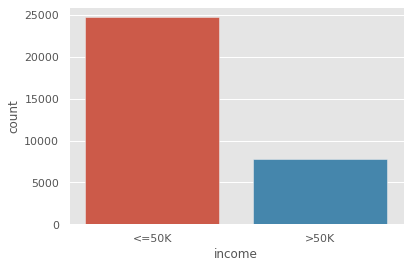

In [138]:
# Verificar o balanceamento das variaveis.  >s0k , < 50 k 

sns.countplot(x= 'income',data= df);



**Distribuição por Nivel de escolaridade**

Destaque para HS-grad, Some-college e Bachelors.

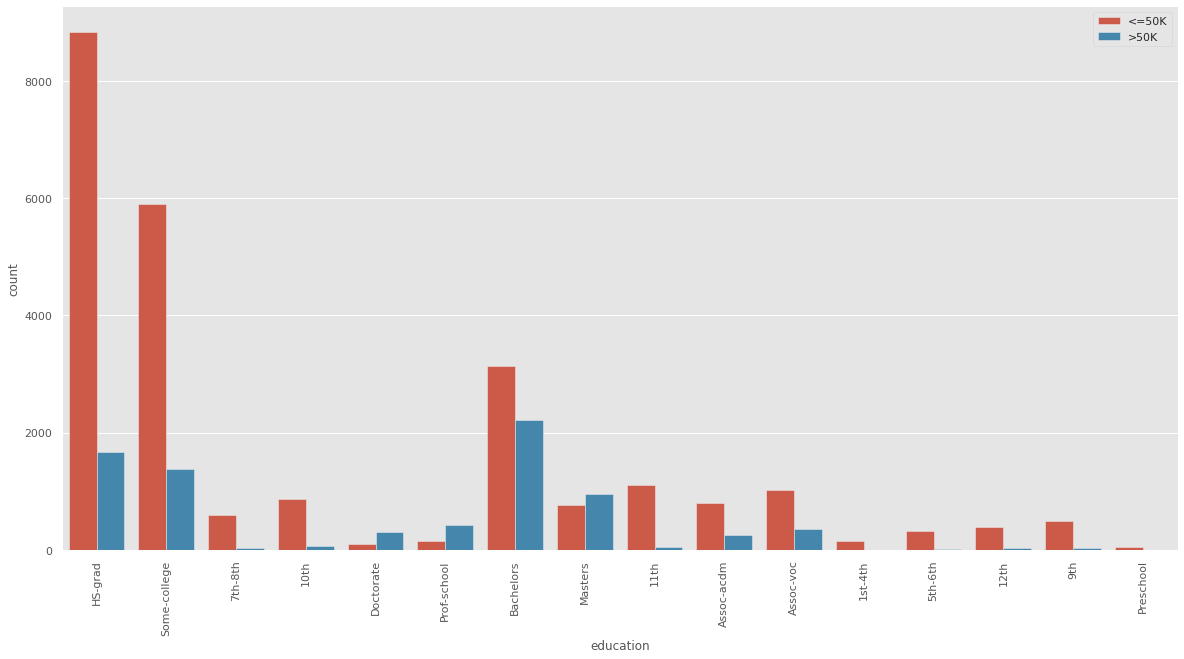

In [139]:
plt.figure(figsize=(20,10))
sns.countplot(x= 'education',data=df,hue='income',)
plt.legend(loc='upper right')
plt.xticks(rotation=90)
plt.show()

**Distribuição das classes "Education"**

In [140]:
df['education'].value_counts()

HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education, dtype: int64

**Verificando a menor e a maior Jornada**


In [141]:
print('Maior carga horária:', df['hours.per.week'].max(),'horas/semana')
print('Menor carga horária:', df['hours.per.week'].min(),'horas/semana')

Maior carga horária: 99 horas/semana
Menor carga horária: 1 horas/semana


DIante dessa grande diferença, provavelmente os valores não estão disseminados.

**Valores Únicos**



In [142]:
# visualizar colunas contagem e valores horas por semana. 
hour =pd.DataFrame(df['hours.per.week'].value_counts())
hour.reset_index(inplace=True)
hour.columns = (['Valores','Horas'])
list(hour.values)

[array([   40, 15217]),
 array([  50, 2819]),
 array([  45, 1824]),
 array([  60, 1475]),
 array([  35, 1297]),
 array([  20, 1224]),
 array([  30, 1149]),
 array([ 55, 694]),
 array([ 25, 674]),
 array([ 48, 517]),
 array([ 38, 476]),
 array([ 15, 404]),
 array([ 70, 291]),
 array([ 10, 278]),
 array([ 32, 266]),
 array([ 24, 252]),
 array([ 65, 244]),
 array([ 36, 220]),
 array([ 42, 219]),
 array([ 44, 212]),
 array([ 16, 205]),
 array([ 12, 173]),
 array([ 43, 151]),
 array([ 37, 149]),
 array([  8, 145]),
 array([ 52, 138]),
 array([ 80, 133]),
 array([56, 97]),
 array([28, 86]),
 array([99, 85]),
 array([46, 82]),
 array([18, 75]),
 array([72, 71]),
 array([75, 66]),
 array([ 6, 64]),
 array([ 5, 60]),
 array([ 4, 54]),
 array([47, 49]),
 array([84, 45]),
 array([22, 44]),
 array([54, 41]),
 array([ 3, 39]),
 array([33, 39]),
 array([39, 38]),
 array([41, 36]),
 array([14, 34]),
 array([ 2, 32]),
 array([27, 30]),
 array([26, 30]),
 array([17, 29]),
 array([49, 29]),
 array([90, 

Veja a dificuldade em visualizar a coluna 'hours-per-week'. Vamos fazer um Scatel plot 

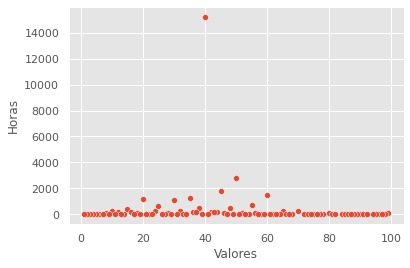

In [143]:
sns.scatterplot(data = hour,y = 'Horas',x= 'Valores');

**Discretizando Dados**

Veja que mesmo com a contagem de valores a visualização está bem ruim, por isso é interessante dividir por categorias.

O único insight que podemos tirar desses gráficos é que há apenas um valor em horas de trabalho que realmente é expressivo. 40h semanais com 15217 contagens.

Além de que, isso não nos mostra nada em relação ao valor final.

Na verdade, se houvesse a intenção de entender algo em relação a essa distribuição, poderiamos utilizar apenas partes dos dados, mas na verdade o que queremos é entender como se relaciona com os valores trabalhados por horas. 

Pra isso será feita uma categorização (discretização ou binarização) dos dados e todos esses 94 dados serão divididos em 3 categorias, que serão:

- 0-30 (jornada curta)
- 30-40 (jornada normal)
- 40-100 (jornada extra)


In [144]:
df['hours.per.week'] = pd.cut(df['hours.per.week'],[0,30,40,100],labels= ['Short','normal','extra'])


**Distribuição das classes por horas trabalhadas**


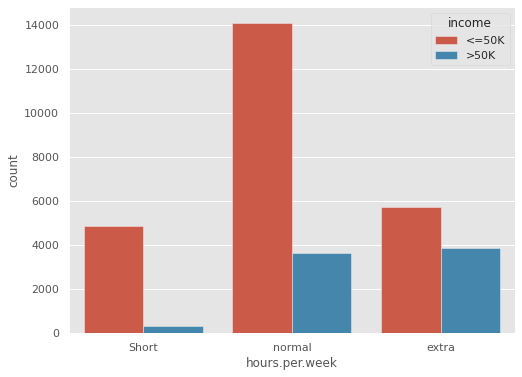

In [145]:
plt.figure(figsize=(8,6))
sns.countplot(data = df,x="hours.per.week",hue="income");

**Agora vamos verificar a nova distribuição com os dados já discretizados**

In [146]:
df['hours.per.week'].value_counts()

normal    17735
extra      9581
Short      5245
Name: hours.per.week, dtype: int64

**Distribuição das classes de acordo com a ocupação**

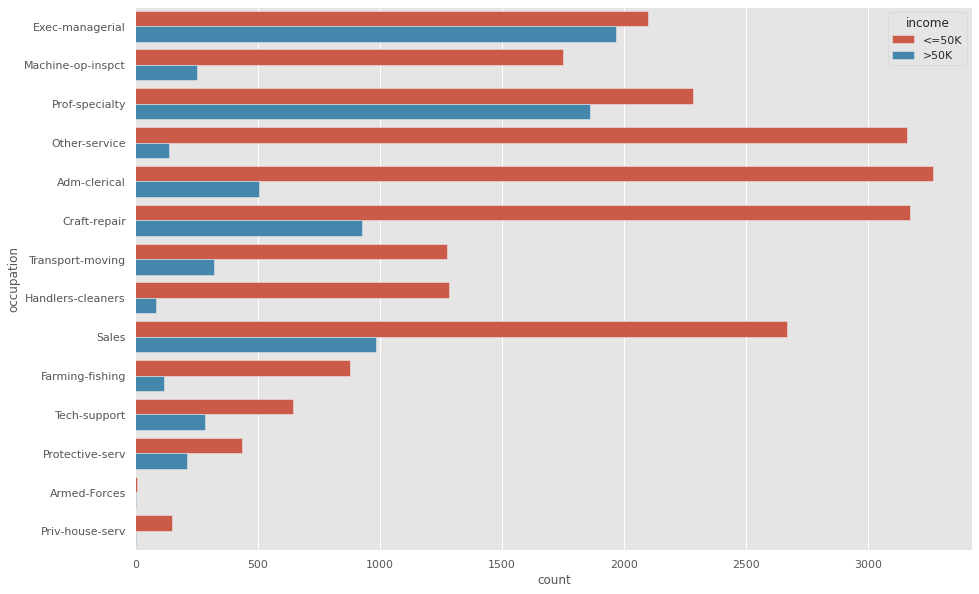

In [147]:
plt.figure(figsize=(15,10))
sns.countplot(data=df,y='occupation',hue='income')

**Distribuição da variável 'occupation'**

In [148]:
df['occupation'].value_counts()

Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: occupation, dtype: int64

**Correlação entre variáveis 'sex' e 'income'**

Podemos perceber com o gráfico de barras abaixo que o Dataset tem uma maior numeros de cadastro de homens que de mulheres. Numéricamente **21790 Homens e 10771 Mulheres** . Contudo podemos tirar uma informação estatística muito interessante veja bem. 

A proporção de mulheres que recebem salários anuais acima de 50 k representam 11% do total do mesmo sexo. Enquanto o Homem tem taxa resultante de 30%.

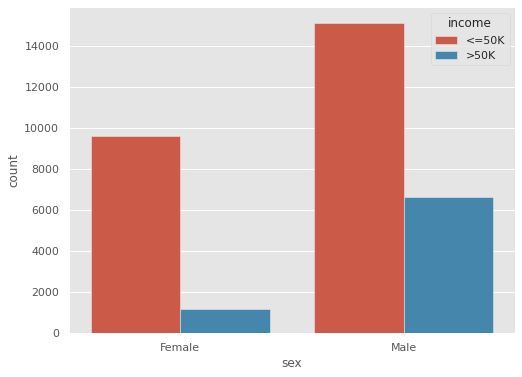

In [149]:
plt.figure(figsize=(8,6))
sns.countplot(x='sex',data=df,hue='income');

**Correlação entre a variavel 'Race' e 'Income'**

Como, infelizmente não poderia ser diferente, a maioria empregada é da cor branca e também são eles, de longe, que ganham os maiores salários.





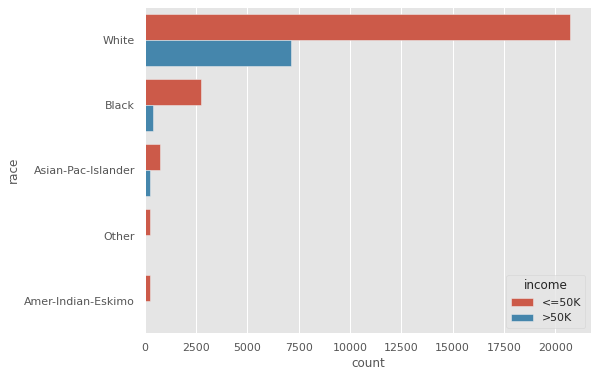

In [150]:
plt.figure(figsize=(8,6))
sns.countplot(y= 'race',hue = 'income',data= df);

**Verificando a idade mínima e máxima do dataset**



In [151]:
print(f"A idade minima é:{df.age.min()} Anos")
print(f"A idade máxima é:{df.age.max()} Anos")

A idade minima é:17 Anos
A idade máxima é:90 Anos


**Aplicar discretização**

Vamos agrupar as idades em 3 categorias:

- 0-25 anos (jovens)
- 25-50 anos (adultos)
- 50-100 anos (idosos)

Tal qual foi feito com a variável 'hours-per-week'


In [152]:
df['Age'] = pd.cut(df['age'],[0,25,50,100],labels=['child','Adult','Old'])

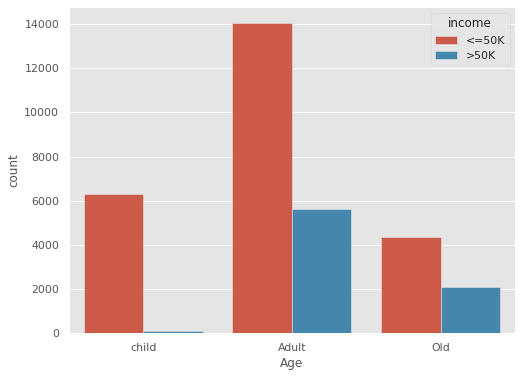

In [153]:
## Visualização

plt.figure(figsize=(8,6))
sns.countplot(hue='income',x='Age',data=df);

## 3. Substituindo os Valores Faltantes

**Verificando a Quantidade de valores nulos no datase**

In [154]:
# Criando Total valores nulos
total = df.isnull().sum().sort_values(ascending = False)
# Criando porcentagem.
porcent  = df.isnull().sum().sort_values(ascending = False) * 100 / df.shape[0] 
# Criando dataframe. 
missing_data = pd.concat([total,porcent],axis=1,keys=['total','percent'])
# visualizando somente os com percentual diferente de zero
missing_data[missing_data['percent']!=0]


,total,percent
occupation,1843,5.660146
workclass,1836,5.638647
native.country,583,1.790486


**Preenchendo os valores nulos da coluna 'workclass'**



In [155]:
top = 'Private'
df['workclass'] = df.workclass.fillna('top')

**Preenchendo os valores nulos da coluna 'occupation'**

In [156]:
top = 'Prof-specialty'
df['occupation'] = df['occupation'].fillna(top)
df.occupation.value_counts()

Prof-specialty       5983
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: occupation, dtype: int64

**Preenchendo os valores nulos da coluna 'native-country'**

In [157]:
top = 'United-states'
df['native.country'] = df['native.country'].fillna(top)

**Verificando se ainda existem valores nulos no Dataset**

In [158]:
if df.isnull().sum().sort_values(ascending= False).any()!= 0:
  print(f'Existem valores nulos {True}')
else:
  print(f'Existem valores nulos {False}')  
   



Existem valores nulos False


**Criando uma nova coluna com a renda final**

In [159]:
df['capital_last'] = df['capital.gain'] - df['capital.loss']

**Criando função para remover as features sempre que necessário**

In [160]:
def remove_feaatures(lista_features):
  for i in lista_features:
    df.drop(i,axis=1,inplace=True)


**Removendo as primeiras features**

A coluna 'educational-num' está preenchida com o código referente a cada nível de escolaridade, dessa maneira podemos excluir a coluna 'education'.

As colunas 'capital-gain' e 'capital-loss' estão representadas pela nova coluna que criamos anteriormente.

In [161]:
remove_feaatures(['capital.gain','capital.loss','fnlwgt']) 

**Transformando as variáveis categóricas em numéricas**

In [162]:
# selecionando apenas as colunas categóricas
cols = df[df.select_dtypes(['object']).columns]
# iterando sobre as colunas para transformar em numéricas com label encoder
for c in cols:
    encoding = LabelEncoder()
# transformando
    encoding.fit(list(df[c].values))
    df[c] = encoding.transform(list(df[c].values))
# aplicando o get_dummies
df = pd.get_dummies(df)




Caso queira intender o método get_dummies, leia este [artigo](https://medium.com/@albertum/preprocessing-onehotencoder-vs-pandas-get-dummies-3de1f3d77dcc) 

In [163]:
df.head()

,age,workclass,education,education.num,marital.status,occupation,relationship,race,sex,native.country,income,capital_last,hours.per.week_Short,hours.per.week_normal,hours.per.week_extra,Age_child,Age_Adult,Age_Old
0,90,8,11,9,6,9,1,4,0,38,0,-4356,0,1,0,0,0,1
1,82,3,11,9,6,3,1,4,0,38,0,-4356,1,0,0,0,0,1
2,66,8,15,10,6,9,4,2,0,38,0,-4356,0,1,0,0,0,1
3,54,3,5,4,0,6,4,4,0,38,0,-3900,0,1,0,0,0,1
4,41,3,15,10,5,9,3,4,0,38,0,-3900,0,1,0,0,1,0


**Checando as correlações**

Isso possibilita a análise simultânea da associação entre variáveis.

Os números 1.00 são das variáveis com elas mesmas, logo 1.00 é a mais alta correlação positiva, ao passo que 0 não há correlação e -1 é a correlação negativa, ou seja, enquanto uma variável cresce a outra diminui na mesma proporção, enquanto uma desce, a outra sobe na mesma proporção.

A partir de 0.7, 0.8 pode ser considerada como alta correlação.

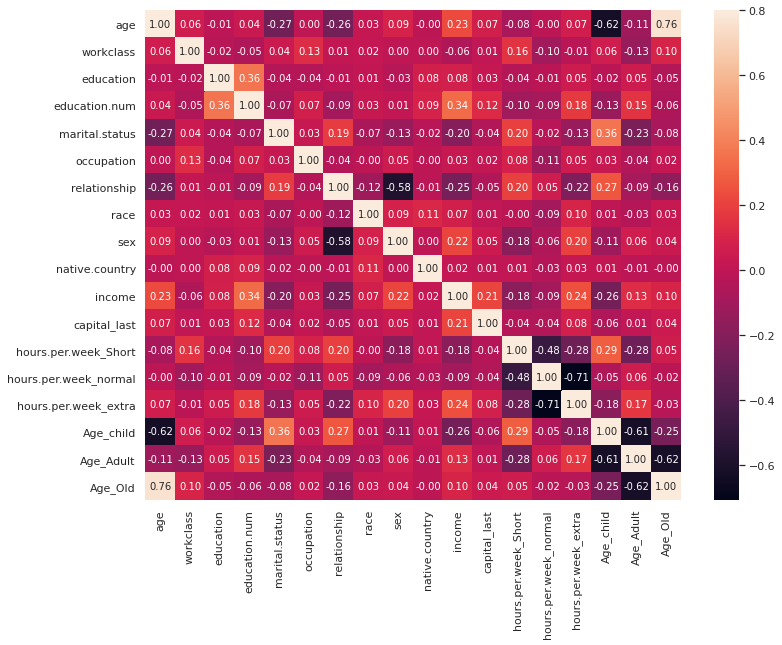

In [164]:
corr = df.corr()
sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})
plt.subplots(figsize=(12, 9))
sns.heatmap(corr, vmax=.8,annot_kws={'size': 10}, annot=True, fmt='.2f');

**Vamos verificar as correlações entre a variável 'income' e as demais variáveis.**

In [165]:
corr_list = corr['income'].sort_values(axis=0,ascending=False).iloc[1:]
corr_list

education.num            0.335154
hours.per.week_extra     0.244120
age                      0.234037
sex                      0.215980
capital_last             0.214428
Age_Adult                0.130379
Age_Old                  0.097687
education                0.079317
race                     0.071846
occupation               0.034625
native.country           0.022990
workclass               -0.055124
hours.per.week_normal   -0.092129
hours.per.week_Short    -0.177816
marital.status          -0.199307
relationship            -0.250918
Age_child               -0.258270
Name: income, dtype: float64

É possivel notar com os dados correlacionados acima que o modelo conseguiu identificar que os salários/`income` possui correlação direta com `Education.num`, `hours.per.week_extra`,`age,sex`,`capital_last`. Ou seja dado um valor de salário é possivel supor o grau de formação, horas extras por semana,sexo e receita de uma pessoa nos EUA.

## 4. Selecionando Features Importantes

**Separando a classe dos Dados**

In [166]:
previsores = df.drop('income',axis=1)
classe = df['income']

**Criando classificador para visualizar as features mais importantes para o modelo**

Como falado [aqui](https://bit.ly/2Sg9LM7) os modelos de *Random Forest* e *Decision Tree* têm a vantagem de nos fornecer de uma forma clara quais features realmente importam para o modelo. 

Deste modo, podemos excluir do nosso modelo aquelas variáveis que não têm importância e que, no fim, acabam retirando um pouco da precisão do modelo.

Ainda que o algoritmo final não seja nenhum deles, extrair essas regras nos darão vantagem para qualquer modelo de Machine Learning.

In [167]:
clf=RandomForestClassifier(n_estimators=100, random_state=12)
clf.fit(previsores, classe)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=12, verbose=0,
                       warm_start=False)

**Visualizando as features mais importantes**

In [168]:
feature_imp = pd.Series(clf.feature_importances_,index=previsores.columns).sort_values(ascending=False)
feature_imp

age                      0.213000
capital_last             0.176726
relationship             0.110589
education.num            0.105477
occupation               0.099476
marital.status           0.077899
workclass                0.061279
education                0.036349
native.country           0.025848
race                     0.020464
hours.per.week_extra     0.016619
sex                      0.015285
Age_child                0.012643
hours.per.week_Short     0.010445
hours.per.week_normal    0.007599
Age_Adult                0.005343
Age_Old                  0.004961
dtype: float64

Após a aplicação do Modelo de Random Florest. Conclui-se que as Features mais importantes são : `age`,`capital_last` e `relationship`.  

**Visualizando graficamente as features mais importantes**

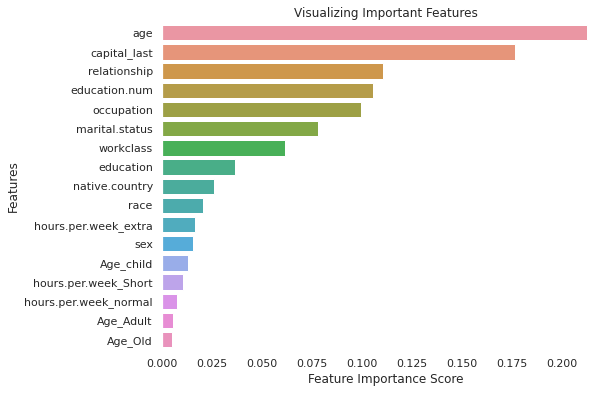

In [169]:
plt.figure(figsize=(8,6))
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

**Selecionando as features de maior importância**

Aquelas acima de 3% de importância

In [170]:
features_selected = []
for feature,importance in feature_imp.iteritems():
# iteritems retorna um iterador que nos permiter iterar sobre a chave ou valor
    if importance > 0.03:
        print(f'{feature}: {round(importance * 100)}%')
        features_selected.append(feature)

age: 21%
capital_last: 18%
relationship: 11%
education.num: 11%
occupation: 10%
marital.status: 8%
workclass: 6%
education: 4%


##5. Treinando Modelos de Machine Learning

Treinando os modelos utilizando apenas as features selecionadas

In [171]:
previsores = df[features_selected]
classe = df['income']

**Criando modelo de Machine Learning a partir de cada algoritmo**

Os dados estão em diferentes escalas e isso pode prejudicar a performance de alguns algoritmos, logo deve-se aplicar a Padronização ao conjunto de dados (colocando-os na mesma escala). Nesta técnica, os dados serão transformados de modo que estejam com uma distribuição normal, com média igual a zero e desvio padrão igual a 1.

Observação:

O modelo SVM não foi utilizado por não funcionar bem grandes conjuntos de dados, uma vez que o tempo de treinamento necessário é maior.

In [172]:
pipelines = []
pipelines.append(('Scaled-LR', Pipeline([('Scaler', StandardScaler()),('LR', LogisticRegression())]))),
pipelines.append(('Scaled-KNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsClassifier())]))),
pipelines.append(('Scaled-NB', Pipeline([('Scaler', StandardScaler()),('NB', GaussianNB())]))),
pipelines.append(('Scaled-DT', Pipeline([('Scaler', StandardScaler()),('DT', DecisionTreeClassifier())]))),
pipelines.append(('Scaled-RF', Pipeline([('Scaler', StandardScaler()),('RF', RandomForestClassifier())])))
resultados = []
nomes = []

# Percorrendo cada um dos modelos e fazedo o cross validation
for nome, modelo in pipelines:
    kfold = StratifiedKFold(n_splits=10, shuffle = True, random_state=12)
    cross_val_result = model_selection.cross_val_score(modelo, 
                                                     previsores, 
                                                     classe, 
                                                     cv = kfold, 
                                                     scoring = 'accuracy')
    resultados.append(cross_val_result)
    nomes.append(nome)
# retornando a média das validações, bem como seu desvio padrão
    texto = "%s: %f (%f)" % (nome, cross_val_result.mean(), cross_val_result.std())
    print(texto)

Scaled-LR: 0.814932 (0.003928)
Scaled-KNN: 0.831670 (0.004521)
Scaled-NB: 0.804951 (0.006565)
Scaled-DT: 0.826142 (0.006022)
Scaled-RF: 0.841344 (0.005910)


In [173]:
pipelines

[('Scaled-LR', Pipeline(memory=None,
           steps=[('Scaler',
                   StandardScaler(copy=True, with_mean=True, with_std=True)),
                  ('LR',
                   LogisticRegression(C=1.0, class_weight=None, dual=False,
                                      fit_intercept=True, intercept_scaling=1,
                                      l1_ratio=None, max_iter=100,
                                      multi_class='auto', n_jobs=None,
                                      penalty='l2', random_state=None,
                                      solver='lbfgs', tol=0.0001, verbose=0,
                                      warm_start=False))],
           verbose=False)), ('Scaled-KNN', Pipeline(memory=None,
           steps=[('Scaler',
                   StandardScaler(copy=True, with_mean=True, with_std=True)),
                  ('KNN',
                   KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                        metric='minkowski', m

**Visualizando os melhores algoritmos via boxplot**

De acordo com os resultados anteriores, o modelo de Random Forest apresentou o melhor valor de acurácia e conseguinte os melhores resultados.

O gráfico de Caixas ou BoxPlot nos ajudará a visualizar isso melhor.

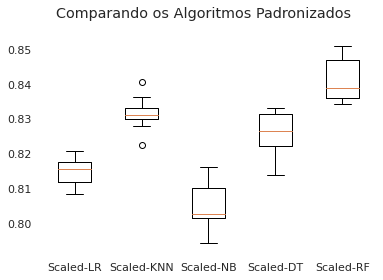

In [174]:
fig = plt.figure()
fig.suptitle('Comparando os Algoritmos Padronizados')
ax = fig.add_subplot(111)
plt.boxplot(resultados)
ax.set_xticklabels(nomes)
plt.show()

##6. Fazendo Tuning do Modelo

Embora o Random Forest tenha apresentado o menor erro após a padronização dos dados, pode-se ainda otimizá-lo com o ajuste dos seus parâmetros.



In [175]:
# # Definindo a escala
scaler = StandardScaler()
previsores = scaler.fit_transform(previsores)

# Possíveis valores de estimators
val_estimators = [20, 50, 100, 150, 200]

# Possíveis valores para o critério de divisão
val_criterion = ['gini', 'entropy']

# Definindo um dicionário que recebe as listas de parâmetros e valores
parametros_grid = dict(n_estimators = val_estimators,
                       criterion = val_criterion)
                      
                       
# Criando o modelo
modelo_random = RandomForestClassifier()

# Definindo K
kfold = StratifiedKFold(n_splits=10, shuffle = True, random_state=12)

# Testando diferentes combinações com os parâmetros
grid = RandomizedSearchCV(estimator = modelo_random, param_distributions = parametros_grid, cv = kfold, scoring = 'accuracy')
grid.fit(previsores, classe)

# Print do resultado
print("Grid scores on development set:")
means = grid.cv_results_['mean_test_score'].round(5)
stds = grid.cv_results_['std_test_score'].round(5)

for mean, std, params in zip(means, stds, grid.cv_results_['params']):
    print(f'mean:{mean},std:{std},params:{params}')
print()
print(f'Melhor parâmetro:{grid.best_params_}, Score:{grid.best_score_}')

Grid scores on development set:
mean:0.84045,std:0.005,params:{'n_estimators': 20, 'criterion': 'gini'}
mean:0.84058,std:0.00497,params:{'n_estimators': 50, 'criterion': 'gini'}
mean:0.84174,std:0.00546,params:{'n_estimators': 100, 'criterion': 'gini'}
mean:0.84085,std:0.00462,params:{'n_estimators': 150, 'criterion': 'gini'}
mean:0.84174,std:0.00519,params:{'n_estimators': 200, 'criterion': 'gini'}
mean:0.84058,std:0.0043,params:{'n_estimators': 20, 'criterion': 'entropy'}
mean:0.84051,std:0.00432,params:{'n_estimators': 50, 'criterion': 'entropy'}
mean:0.84227,std:0.00516,params:{'n_estimators': 100, 'criterion': 'entropy'}
mean:0.84184,std:0.00515,params:{'n_estimators': 150, 'criterion': 'entropy'}
mean:0.84104,std:0.00498,params:{'n_estimators': 200, 'criterion': 'entropy'}

Melhor parâmetro:{'n_estimators': 100, 'criterion': 'entropy'}, Score:0.842265402282289


##7. Preparando a Versão Final do Modelo

In [181]:
scaler = StandardScaler()
previsores = scaler.fit_transform(previsores)
modelo_tree = RandomForestClassifier(criterion='entropy', max_depth=14, random_state=12)
modelo_tree.fit(previsores,classe)
result_tree = cross_val_predict(modelo_tree,previsores, classe, cv=10)

print(f'Acurácia: {accuracy_score(classe,result_tree)}')
print('\n',confusion_matrix(classe,result_tree))
print('\n',classification_report(classe,result_tree))

Acurácia: 0.8067626915635269

 [[22570  2150]
 [ 4142  3699]]

               precision    recall  f1-score   support

           0       0.84      0.91      0.88     24720
           1       0.63      0.47      0.54      7841

    accuracy                           0.81     32561
   macro avg       0.74      0.69      0.71     32561
weighted avg       0.79      0.81      0.80     32561



##8. Persistindo o Modelo em Disco

**Persistindo com Pickle**

In [177]:
#filename = 'model_final.sav'
pickle.dump(modelo_tree, open('modelo.sav', 'wb'))
pickle.load(open('modelo.sav', 'rb'))

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=14, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=12, splitter='best')

**Persistindo com Joblib**

In [178]:
dump(modelo_tree,'modelo.pkl')

['modelo.pkl']

**Carregando o modelo**

In [180]:
from joblib import load
model=load('modelo.pkl')

---
##Obrigado!

Obrigado por ter disponibilizado um pouco do seu tempo e atenção aqui. Espero que, de alguma forma, tenha sido útil para seu crescimento. Se houver qualquer dúvida ou sugestão, não hesite em entrar em contato no LinkedIn e verificar meus outros projetos no GitHub.

[![LinkedIn](https://img.shields.io/badge/LinkedIn-MuriloAugustoPó-blue.svg)](https://www.linkedin.com/in/muriloaugustopo/)
[![GitHub](https://img.shields.io/badge/GitHub-murilopo-darkblue.svg)](https://github.com/amadords)
